In [1]:
import typing
import numpy as np
import json
import math
from pylab import cm
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import AxesGrid

In C:\Users\sning\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sning\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sning\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sning\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sning\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#load the data and print the dimension
ADF = np.load("D:/Graphene/1/HAADF.npy")
dat4d=np.load('D:/Graphene/1/Spectrum Image 64 x 64 x 258 x 256.npy')
np.shape(dat4d)

(64, 64, 258, 256)

In [3]:
#get the averaged CBED patterns.
pacbed = np.average(dat4d, axis=(0,1))

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to us

Text(0.5, 1.0, 'Masked PACBED')

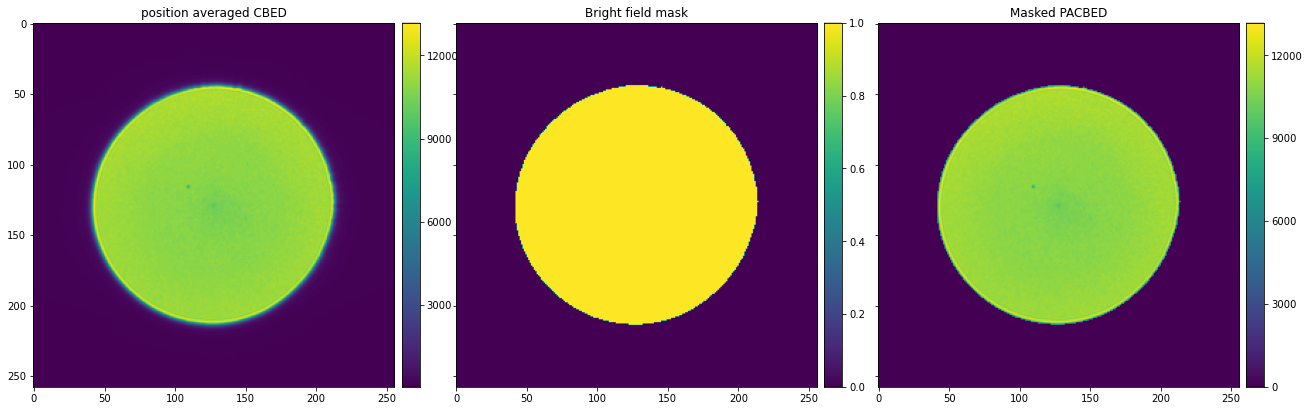

In [46]:
#get the mask of aperture via threshold values.
thresh = np.max(pacbed)*0.5
BFdisk = pacbed > thresh
mpacbed = pacbed * BFdisk
fig =plt.figure(1, figsize=(75, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(pacbed, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("position averaged CBED")
im=grid[1].imshow(BFdisk, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("Bright field mask")
im=grid[2].imshow(mpacbed, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("Masked PACBED")

In [48]:
#compute the center of aperture according to determined mask image. 
X, Y = np.meshgrid(np.arange(0, pacbed.shape[1]), np.arange(0, pacbed.shape[0]))
x_center, y_center =np.average(mpacbed * X), np.average(mpacbed * Y)
x_center/=np.average(mpacbed)
y_center/=np.average(mpacbed)
print(x_center)
print(y_center)

126.84423221754624
127.97470418062463


In [49]:
#get the edge of bright field apertuer and fit the radius in pixels. 
grad=np.sqrt(np.sum(np.square(np.abs(np.gradient(pacbed))), axis =0))
edge = grad > np.max(grad)*0.5
radius = np.average(np.sqrt((X - x_center) ** 2 + (Y - y_center) ** 2)[edge])
print(radius)

84.77598264560444


In [50]:
#get the half of the aperture.
InnerBFdisk = (np.sqrt((X - x_center) ** 2 + (Y - y_center) ** 2))<(radius/2)

In [51]:
#get ABF image.
BFImage=[]
InnerBFImage=[]
for ycan in range(np.shape(dat4d)[0]):
    for xcan in range(np.shape(dat4d)[1]):
        BFImage.append(np.sum(dat4d[ycan,xcan,:,:]*BFdisk))
        InnerBFImage.append(np.sum(dat4d[ycan,xcan,:,:]*InnerBFdisk))
BFImage = np.reshape(np.asarray(BFImage), (np.shape(dat4d)[0], np.shape(dat4d)[1]))
InnerBFImage = np.reshape(np.asarray(InnerBFImage), (np.shape(dat4d)[0], np.shape(dat4d)[1]))

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  


Text(0.5, 1.0, 'Annular Bright Field Image')

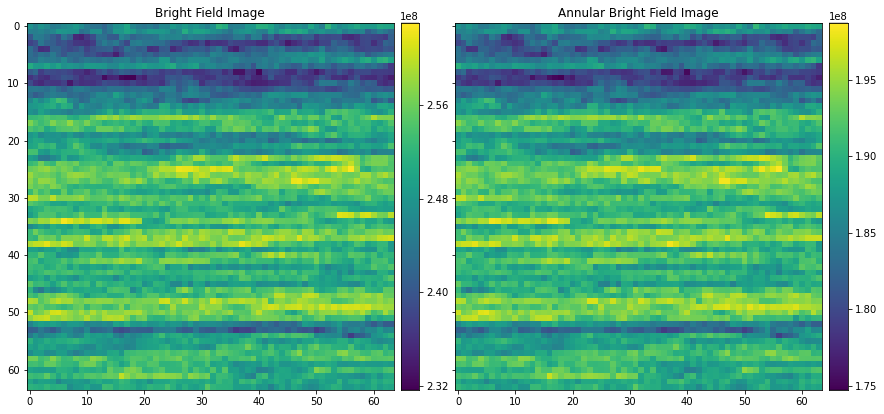

In [52]:
#get the mask of aperture via threshold values.
fig =plt.figure(1, figsize=(50, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(BFImage, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("Bright Field Image")
im=grid[1].imshow(BFImage - InnerBFImage, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("Annular Bright Field Image")

In [53]:
#get the Center of Mass along x and y directions.
xCoM=[]
yCoM=[]
X = X - x_center
Y = Y - y_center
for ycan in range(np.shape(dat4d)[0]):
    for xcan in range(np.shape(dat4d)[1]):
        masked_cbed = dat4d[ycan,xcan,:,:]*BFdisk
        xCoM.append(np.sum(masked_cbed*X)/np.sum(masked_cbed))
        yCoM.append(np.sum(masked_cbed*Y)/np.sum(masked_cbed))
xCoM = np.reshape(np.asarray(xCoM), (np.shape(dat4d)[0], np.shape(dat4d)[1]))
yCoM = np.reshape(np.asarray(yCoM), (np.shape(dat4d)[0], np.shape(dat4d)[1]))

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  del sys.path[0]
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases 

Text(0.5, 1.0, 'ADF image')

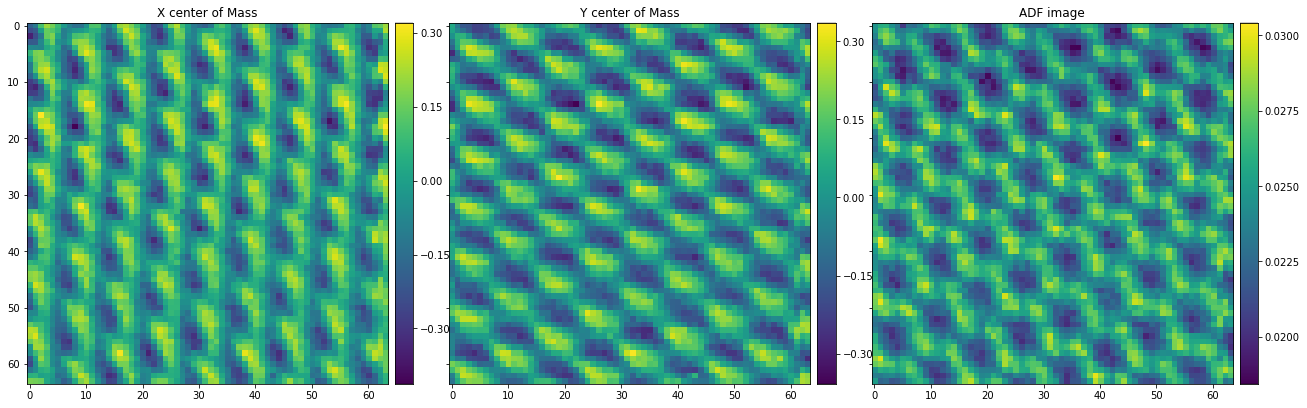

In [54]:
fig =plt.figure(1, figsize=(75, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(xCoM, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("X center of Mass")
im=grid[1].imshow(yCoM, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("Y center of Mass")
im=grid[2].imshow(ADF, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("ADF image")

In [67]:
#get the divergence and curl matrix. 
EXY,EXX=np.gradient(-xCoM);EYY,EYX=np.gradient(-yCoM)
CoreMatrix =[np.sum(EXX*ADF),np.sum(EXY*ADF), np.sum(EYX*ADF), np.sum(EYY*ADF)]
print(CoreMatrix)

[-1.1483371619403062, 0.288617732204548, 0.24725560927287119, -0.670256280205]


In [68]:
v1= [CoreMatrix[3],-CoreMatrix[1]]
v2= [-CoreMatrix[2],CoreMatrix[0]]
v1 /= np.linalg.norm(v1)
v2 /= np.linalg.norm(v2)

In [77]:
EX = -xCoM*v1[0] - yCoM*v1[1]
EY = -yCoM*v2[0] - yCoM*v2[1]
EMag = np.sqrt(EX ** 2 + EY ** 2)
#get charge density.
ChargeDense = EXX*v1[0] + EYX*v1[1] + EXY*v2[0] + EYY*v2[1]

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  del sys.path[0]
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases 

Text(0.5, 1.0, 'Eclectric field magnitude')

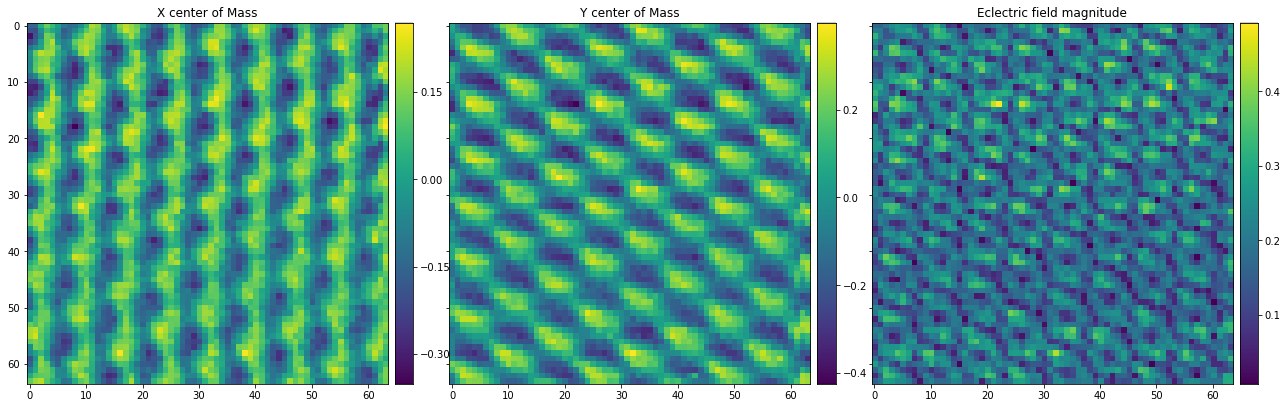

In [78]:
fig =plt.figure(1, figsize=(75, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(EX, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("X center of Mass")
im=grid[1].imshow(EY, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("Y center of Mass")
im=grid[2].imshow(EMag, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("Eclectric field magnitude")

In [79]:
EHSV = np.zeros(EX.shape + (3,), dtype=float)
M = np.amax(EMag)
EMagNorm = EMag / M
for i in range(EX.shape[0]):
    for j in range(EX.shape[1]):
        EHSV[i, j] = np.angle(np.complex(EX[i, j], EY[i, j])) / (2 * np.pi) % 1, 1, EMagNorm[i, j]
ERGB=hsv_to_rgb(EHSV)

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  from ipykernel import kernelapp as app
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be remo

Text(0.5, 1.0, 'Charge Density')

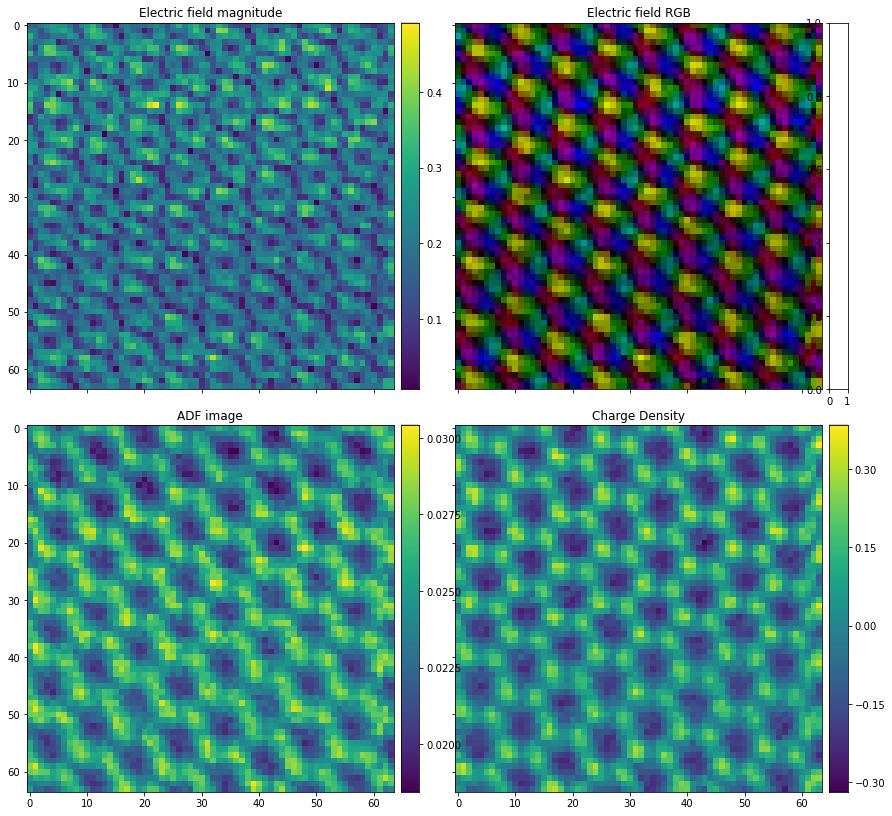

In [80]:
fig =plt.figure(1, figsize=(50, 50))
grid=AxesGrid(fig, 236, nrows_ncols=(2,2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(EMag, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("Electric field magnitude")
im=grid[1].imshow(ERGB)
grid[1].set_title("Electric field RGB")
im=grid[2].imshow(ADF, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("ADF image")
im=grid[3].imshow(ChargeDense, cmap=plt.cm.viridis)
grid.cbar_axes[3].colorbar(im)
grid[3].set_title("Charge Density")